# Exploring MESA models

Let's look at the output from the [MESA stellar evolution code](https://docs.mesastar.org/) for 3 different mass progenitors: 1, 8, and 15 $M_\odot$.
These models were all created using [MESA Web](http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-submit) a web-based interface to MESA
for quick calculations.

To read in these files, we use [py_mesa_reader](https://github.com/wmwolf/py_mesa_reader)

````{tip}
`py_mesa_reader` is available on PyPI, so it can be installed using `pip` as:
```
pip install mesa_reader
```
````

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

MESA provides 2 types of output: profiles and a history.  The profiles represent a snapshot of the start at one instance of time and give the stellar data as a function of radius or enclosed mass.  The history provides some global quantities as a function of time throughout the entire evolution of the star.  We'll use both.

The model files are:

* $0.3 M_\odot$: [M0.3_default_profile8.data](M1_default_profile8.data); [M0.3_default_trimmed_history.data](M1_default_trimmed_history.data)
  
* $1 M_\odot$: [M1_default_profile8.data](M1_default_profile8.data); [M1_default_profile218.data](M1_default_profile218.data); [M1_default_trimmed_history.data](M1_default_trimmed_history.data)

* $8 M_\odot$: [M8_basic_co_profile8.data](M8_basic_co_profile8.data); [M8_basic_co_profile39.data](M8_basic_co_profile39.data); [M8_basic_co_trimmed_history.data](M8_basic_co_trimmed_history.data)

* $15 M_\odot$: [M15_aprox21_profile8.data](M15_aprox21_profile8.data); [M15_aprox21_profile19.data](M15_aprox21_profile19.data); [M15_aprox21_trimmed_history.data](M15_aprox21_trimmed_history.data)

To make the management easier, we'll create a container for each model that holds the history and profiles, processed by `py_mesa_reader`

In [2]:
class Model:
    def __init__(self, mass, profiles=None, history=None):
        self.mass = mass
        if history:
            self.history = mr.MesaData(history)
        self.profiles = []
        if profiles:
            for p in profiles:
                self.profiles.append(mr.MesaData(p))

Now read in all the data.  For each mass we have 2 profiles and 1 history.  The profiles were picked to roughly correspond to the midpoint of core H burning and core He burning.

In [5]:
models = []

models.append(Model(0.3, profiles=["M0.3_default_profile8.data"],
                    history="M0.3_default_trimmed_history.data"))

models.append(Model(1, profiles=["M1_default_profile8.data",
                                 "M1_default_profile218.data"],
                    history="M1_default_trimmed_history.data"))

models.append(Model(8, profiles=["M8_basic_co_profile8.data",
                                 "M8_basic_co_profile39.data"],
                    history="M8_basic_co_trimmed_history.data"))

models.append(Model(15, profiles=["M15_aprox21_profile8.data",
                                  "M15_aprox21_profile19.data"],
                    history="M15_aprox21_trimmed_history.data"))

## HR diagram

Now we'll make an HR diagram and label the points where $H$ and $He$ burning commences.

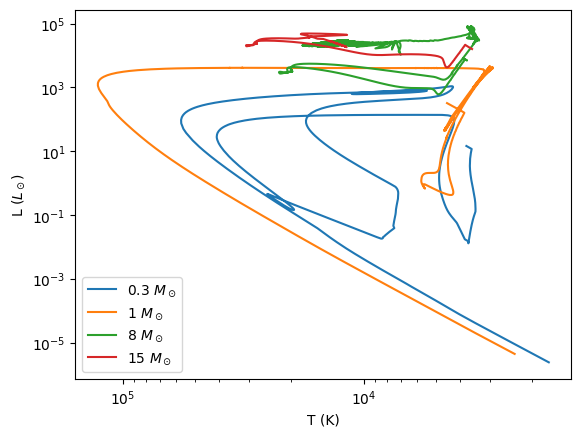

In [6]:
fig, ax = plt.subplots()

for star in models:
    ax.loglog(star.history.Teff, star.history.L,
              label=rf"{star.mass} $M_\odot$")

ax.legend()
ax.set_xlabel("T (K)")
ax.set_ylabel(r"L ($L_\odot$)")
ax.invert_xaxis()

You can see the main sequence clearly on this plot.

We also see that only the 1 solar mass star "finished' stellar evolution, winding up as a cooling white dwarf at the end -- the path it is following is essentially a line of constant radius, since the white dwarf does not contract as it cools (it is degenerate).

## Central evolution

We want to plot the history of the evolution of the central conditions  in the $\log \rho$-$\log T$ plane.

We will plot the EOS boundary lines considered before.  These
functions are now in a module, [regimes.py](regimes.py) to make our life easier.

In [7]:
import regimes

Now we can plot the data

(100000.0, 1000000000.0)

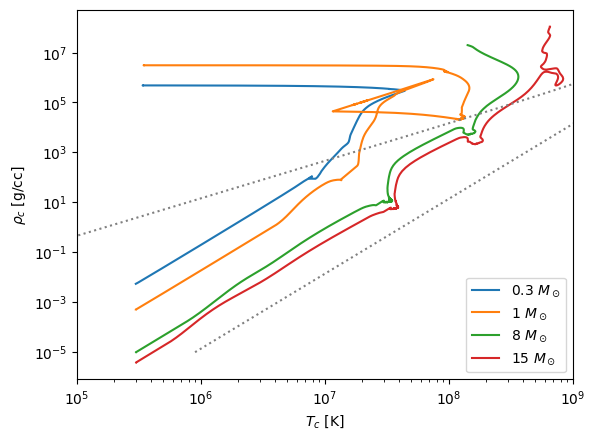

In [8]:
fig, ax = plt.subplots()

for star in models:
    ax.loglog(star.history.center_T, star.history.center_Rho,
              label=rf"{star.mass} $M_\odot$")

rho = np.logspace(-5, 8, 100)
ax.loglog(regimes.deg_ideal(rho, mu_e=1.3), rho, color="0.5", ls=":")
ax.loglog(regimes.rad_ideal(rho, mu=0.6), rho, color="0.5", ls=":")
ax.legend()

ax.set_xlabel(r"$T_c$ [K]")
ax.set_ylabel(r"$\rho_c$ [g/cc]")

ax.set_xlim(1.e5, 1.e9)

Some observations:

* The higher mass stars are closer to the line where radiation dominates.
* The 1 solar mass star makes a transition from following $T \approx \rho^{1/3}$ to $\rho = \mbox{constant}$ when degeneracy kicks in.
* The other stars more or less follow the $T \approx \rho^{1/3}$ trend expected from polytropes + ideal gas.


## Main sequence lifetime

We can estimate the main sequence lifetime just by looking for when the core H is all consumed.

(10000.0, 2000000000000.0)

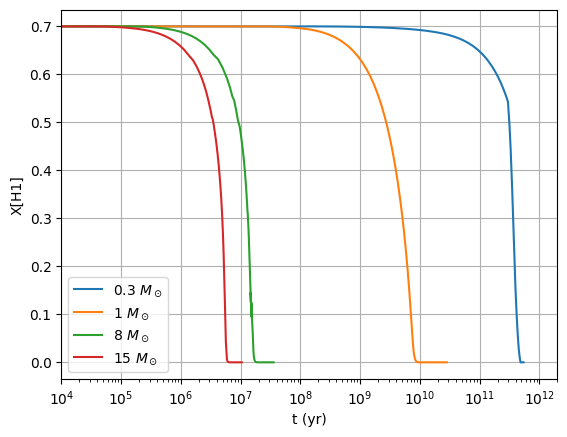

In [10]:
fig, ax = plt.subplots()
for star in models:
    ax.semilogx(star.history.star_age, star.history.center_h1, label=rf"{star.mass} $M_\odot$")
ax.legend()
ax.set_xlabel("t (yr)")
ax.set_ylabel("X[H1]")
ax.grid()
ax.set_xlim(1.e4, 2.e12)

From this plot, we see that the main sequence lifetime of the 15 $M_\odot$ star is $\sim 6\times 10^6$ yr, for the 8 $M_\odot$ star $\sim 2\times 10^7$ yr, for the 1 $M_\odot$ star $\sim 9\times 10^9$ yr,
and for the 0.3 $M_\odot$ star $\sim 4\times 10^{11}$ yr.

## Profiles 

Let's next look at the profiles of the stars in the $\log \rho$-$\log T$ plane

First the 0.3 solar mass star

(1000.0, 1000000000.0)

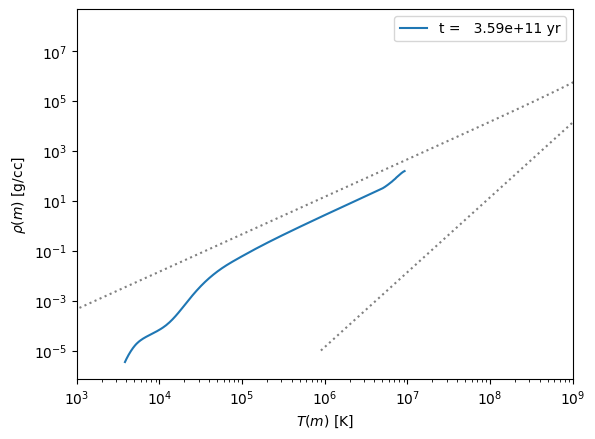

In [11]:
fig, ax = plt.subplots()

for p in models[0].profiles:
    ax.plot(p.T, p.Rho, label=f"t = {p.star_age:10.3g} yr")

ax.loglog(regimes.deg_ideal(rho, mu_e=1.3), rho, color="0.5", ls=":")
ax.loglog(regimes.rad_ideal(rho, mu=0.6), rho, color="0.5", ls=":")
ax.legend()

ax.set_xlabel(r"$T(m)$ [K]")
ax.set_ylabel(r"$\rho(m)$ [g/cc]")

ax.set_xlim(1.e3, 1.e9)

Next the 1 solar mass star

(1000.0, 1000000000.0)

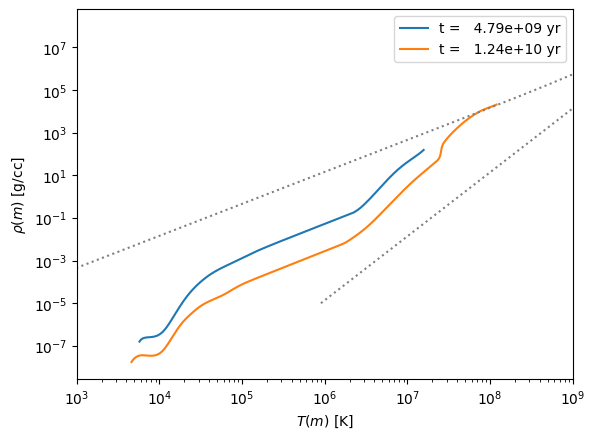

In [12]:
fig, ax = plt.subplots()

for p in models[1].profiles:
    ax.plot(p.T, p.Rho, label=f"t = {p.star_age:10.3g} yr")

ax.loglog(regimes.deg_ideal(rho, mu_e=1.3), rho, color="0.5", ls=":")
ax.loglog(regimes.rad_ideal(rho, mu=0.6), rho, color="0.5", ls=":")
ax.legend()

ax.set_xlabel(r"$T(m)$ [K]")
ax.set_ylabel(r"$\rho(m)$ [g/cc]")

ax.set_xlim(1.e3, 1.e9)

Now the 8 solar mass star

(1000.0, 1000000000.0)

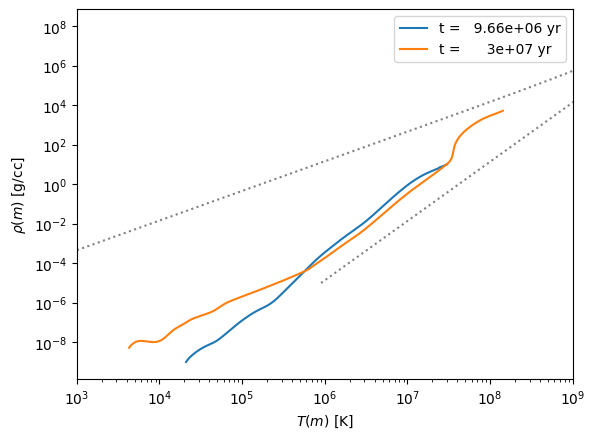

In [13]:
fig, ax = plt.subplots()

for p in models[2].profiles:
    ax.plot(p.T, p.Rho, label=f"t = {p.star_age:10.3g} yr")

ax.loglog(regimes.deg_ideal(rho, mu_e=1.3), rho, color="0.5", ls=":")
ax.loglog(regimes.rad_ideal(rho, mu=0.6), rho, color="0.5", ls=":")
ax.legend()

ax.set_xlabel(r"$T(m)$ [K]")
ax.set_ylabel(r"$\rho(m)$ [g/cc]")

ax.set_xlim(1.e3, 1.e9)

Finally the 15 solar mass star

(1000.0, 1000000000.0)

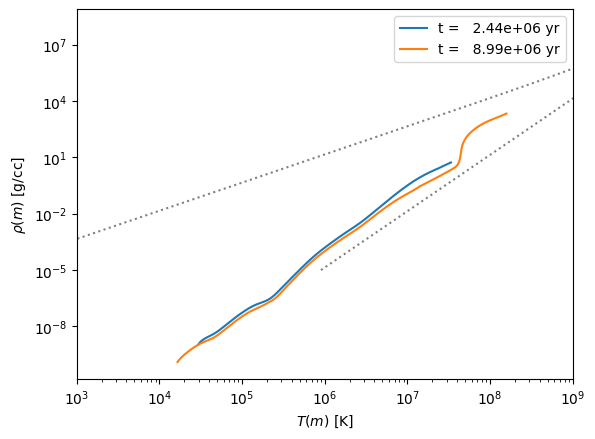

In [14]:
fig, ax = plt.subplots()

for p in models[3].profiles:
    ax.plot(p.T, p.Rho, label=f"t = {p.star_age:10.3g} yr")

ax.loglog(regimes.deg_ideal(rho, mu_e=1.3), rho, color="0.5", ls=":")
ax.loglog(regimes.rad_ideal(rho, mu=0.6), rho, color="0.5", ls=":")
ax.legend()

ax.set_xlabel(r"$T(m)$ [K]")
ax.set_ylabel(r"$\rho(m)$ [g/cc]")

ax.set_xlim(1.e3, 1.e9)

## Eddington Standard Model

The Eddington standard model works for a fully radiative star with a constant composition.

In class, we found that the temperature and density in the Eddington standard model were related by

$$T(r) = 4.62\times 10^6 \beta\mu \left ( \frac{M}{M_\odot} \right)^{2/3} \rho^{1/3}(r)$$

We will assume that $\mu$ is constant and take $\mu$ and $\beta$ from the center of the star.

In [31]:
# CGS constants
k_B = 1.38e-16
m_u = 1.66e-24
m_e = 9.11e-28
c = 3.e10
h = 6.63e-27
a = 5.67e-15

In [36]:
def get_beta(profile):
    """compute the raito of gas to total pressure"""
    P_g = profile.Rho[0] * k_B * profile.T[0] / (profile.mu[0] * m_u)
    beta = P_g / profile.pressure[0]
    return beta

In [37]:
def eddington_T(rho, beta, mu, M):
    return 4.62e6 * beta * mu * M**(2./3.) * rho**(1./3.)

Here's our plotting function.  We will plot the data from the MESA model and the line corresponding to the Eddington standard model.  We will also mark those zones in the MESA model where $\nabla > \nabla_\mathrm{ad}$ with red squares, to indicate that it is convective.

In [49]:
def make_plot(profile, beta, M):
    fig, ax = plt.subplots()
    ax.loglog(profile.Rho, profile.T)
    
    # find where it is convective
    idx = profile.gradT >= profile.grada
    ax.scatter(profile.Rho[idx], profile.T[idx],
               color="r", marker="s", alpha=0.5, linewidth=3)
    ax.loglog(profile.Rho, eddington_T(profile.Rho, beta, profile.mu[0], M),
              ls=":", label="Eddington standard model")
    ax.legend()
    ax.set_xlabel("rho [g/cc]")
    ax.set_ylabel("T [K]")
    ax.set_title(rf"M = {M} $M_\odot$; age = {profile.star_age} years")

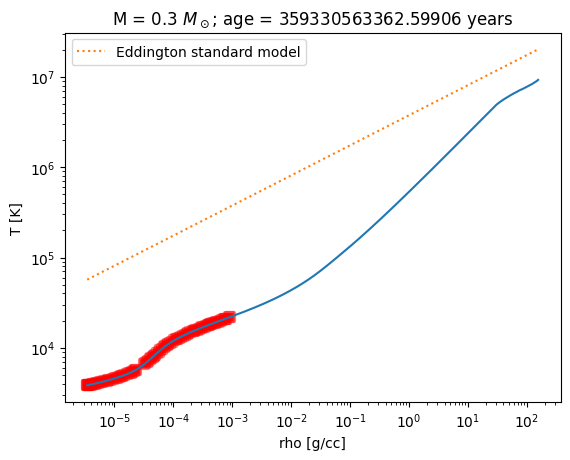

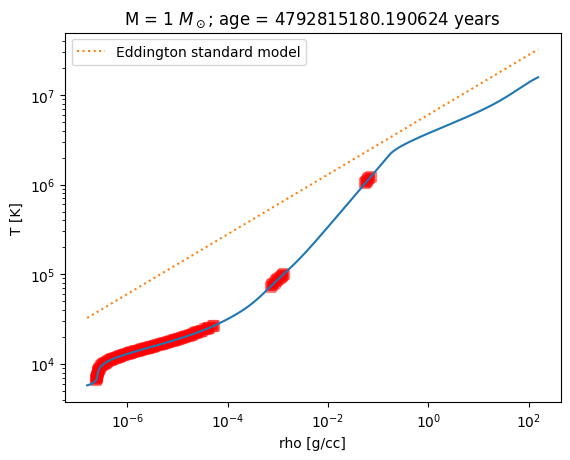

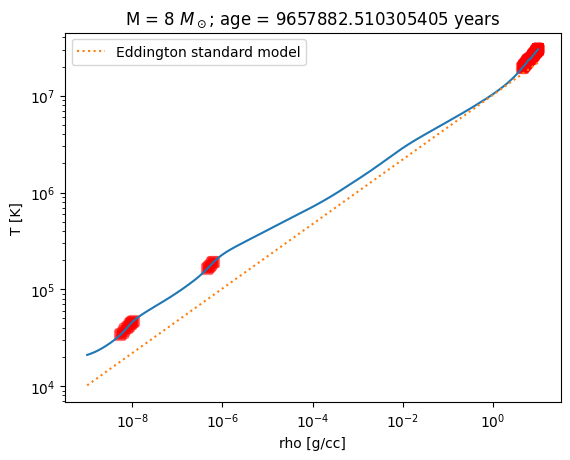

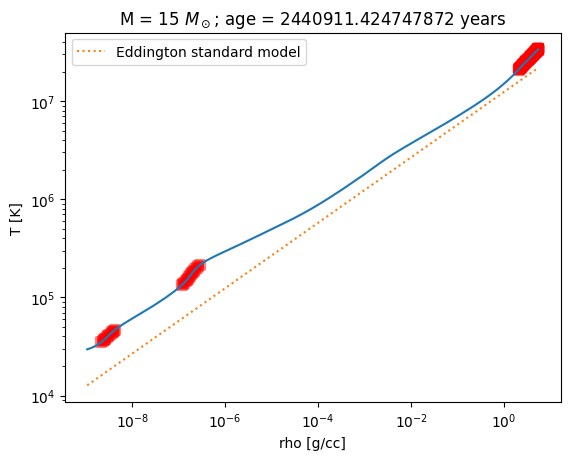

In [50]:
for star in models:
    M = star.mass
    p = star.profiles[0]
    beta = get_beta(p)

    fig = make_plot(p, beta, M)

## Convection

We can look at where the models are convective by comparing $\nabla$ and $\nabla_\mathrm{ad}$.

First the H burning profiles

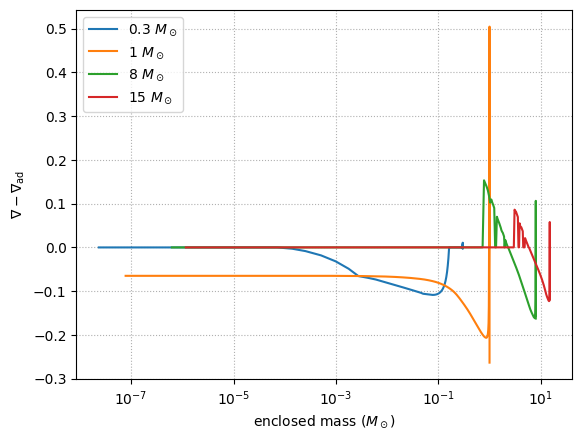

In [15]:
fig, ax = plt.subplots()

for star in models:
    ax.plot(star.profiles[0].mass, star.profiles[0].gradT - star.profiles[0].grada,
            label=rf"{star.mass} $M_\odot$")

ax.set_xlabel(r"enclosed mass ($M_\odot$)")
ax.set_ylabel(r"$\nabla - \nabla_\mathrm{ad}$")
ax.set_xscale("log")
ax.legend()
ax.grid(linestyle=":")

We see that the massive stars have convective cores $\nabla \sim \nabla_\mathrm{ad}$, but the 1 solar mass star has a radiative core.

Let's look at the same plot, but in terms of radius

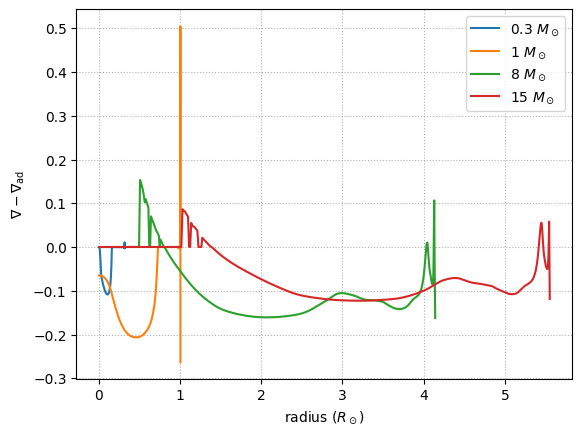

In [16]:
fig, ax = plt.subplots()

for star in models:
    ax.plot(star.profiles[0].radius, star.profiles[0].gradT - star.profiles[0].grada,
            label=rf"{star.mass} $M_\odot$")

ax.set_xlabel(r"radius ($R_\odot$)")
ax.set_ylabel(r"$\nabla - \nabla_\mathrm{ad}$")
#ax.set_xscale("log")
ax.legend()
ax.grid(linestyle=":")

On this scale, we see that the Sun's outer convective zone is ~ 1/3rd of its radius